<a href="https://colab.research.google.com/github/MaicolFranco/Prediction_Credit_Card/blob/main/Credit_Card_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Source**
https://www.kaggle.com/

Dataset description
The dataset consists of 10127 observations, one for each different customer bank's account. For each account the provided relevant information are the following:

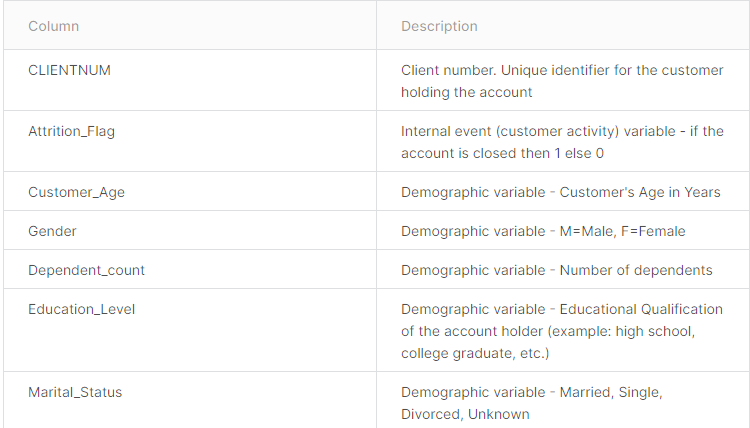 

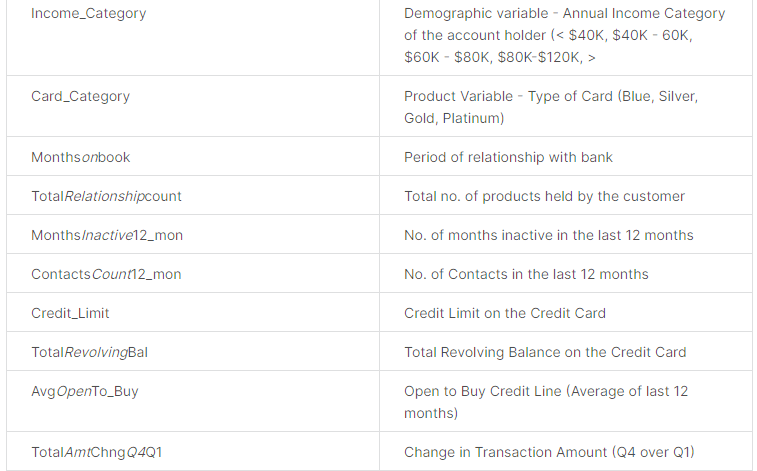


# **Correspondent Imports**

In [103]:
#importaciones correspondientes
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use("seaborn")

# **Cargo information**

In [104]:
df = pd.read_csv("/content/drive/MyDrive/Data Scientist/MACHINE LEARNING/Week_8/Files/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [105]:
df = df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [107]:
# To check the number of rows and columns
print('Data Shape:', df.shape)

# To check if there is any duplicate data 
print('Number of Duplicates:', len(df[df.duplicated()]))

# To check if there is any missing values
print('Number of Missing Values:', df.isnull().sum().sum())

Data Shape: (10127, 20)
Number of Duplicates: 0
Number of Missing Values: 0


# `Remarks:`
There are a total of 10127 records and 20 features in the dataset.

We have different types of columns. integer, float and object data.



There are zero NaN values ​​in the data set.

In the results column we have 'Blue', 'Gold', 'Silver', 'Platinum' which could represent the reasons why a person does not want the card service

a couple of columns were removed as they are irrelevant due to not having information in their rows

# Objetive:
get to know why some people renounce the services of the cards, we could also see if the stratum of the people influences their decisions

# classification or regression?
This proyect is regression

# **features**
Card_Category'

Gender

Education_Level

Card_Category

# **Data Inconsistencies For Categorical Values**

In [108]:
# To check the number of unique value for each column
for col in df:
    print(col, df[col].nunique())

Attrition_Flag 2
Customer_Age 45
Gender 2
Dependent_count 6
Education_Level 7
Marital_Status 4
Income_Category 6
Card_Category 4
Months_on_book 44
Total_Relationship_Count 6
Months_Inactive_12_mon 7
Contacts_Count_12_mon 7
Credit_Limit 6205
Total_Revolving_Bal 1974
Avg_Open_To_Buy 6813
Total_Amt_Chng_Q4_Q1 1158
Total_Trans_Amt 5033
Total_Trans_Ct 126
Total_Ct_Chng_Q4_Q1 830
Avg_Utilization_Ratio 964


In [109]:
check_colums = []
non_numericas = []
def check_numerical_value(col):
    try:
        col_max = df[col].max()
        col_min = df[col].min() 
        if col_min < 0:
            print(f"In the col**** {col}*** there is at leat a value under 0 ******* check!")
            check_colums.append({col +"_min": col_min})
        if col_max > 1:
            print(f"In the col **** {col} **** there is at leat a value over 1 it makes sense? *********** check!")
            check_colums.append({col + "_max": col_max})
        else:
            print(f"the next numerical col seem not to present incosistencies: {col}")
    except:
        non_numericas.append(col)
        print(f"---------column {col} not checked - not numerical col ----------------")

In [110]:
for column in non_numericas:
    print("\n", column, df[column].unique())

everything seems to be very good and related to its corresponding data

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


# **univariate exploratory analysis**

### **Existing Customer Vs Attrited Customer**

Existing Customer: 83.93
Attrited Customer: 16.07


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


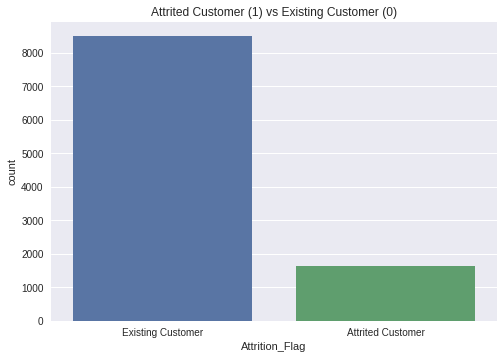

In [112]:
customers = df.Attrition_Flag.value_counts()
print(f'Existing Customer: {round(customers[0] / sum(customers) * 100, 2)}')
print(f'Attrited Customer: {round(customers[1] / sum(customers) * 100, 2)}')
sns.countplot('Attrition_Flag', data = df)
plt.title('Attrited Customer (1) vs Existing Customer (0)');

The graph above shows that the ratio of existing and lost customers for the Attrition_Flag column is seriously unbalanced. We'll have to do a lot of work on it soon

## **Proportion Gender**

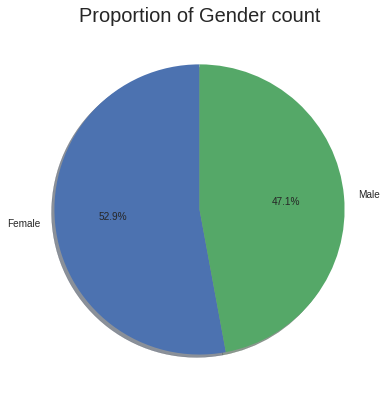

In [113]:
genders = df.Gender.value_counts()
plt.figure(figsize = (6.5,7))
plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'], autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('Proportion of Gender count', fontsize = 20)
plt.show()

we can say that the gender ratio is almost equal

## **Education Levels**

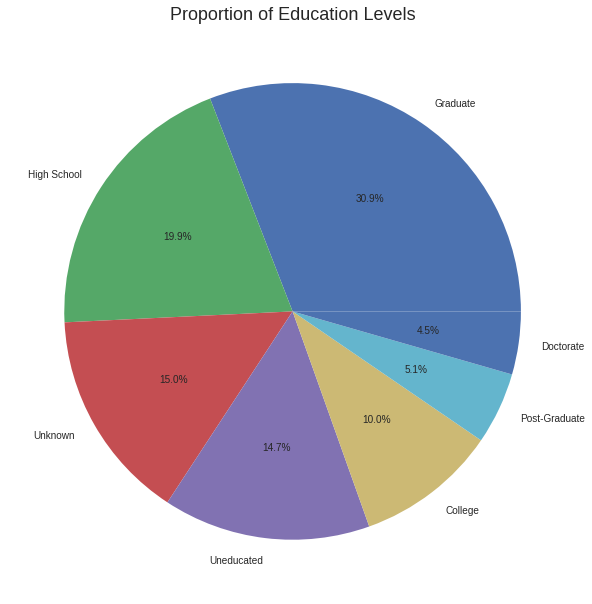

In [114]:
edu = df['Education_Level'].value_counts().to_frame('Counts') 
plt.figure(figsize = (10.5,10.5))
plt.pie(edu['Counts'], labels = edu.index, autopct = '%1.1f%%')
plt.title('Proportion of Education Levels', fontsize = 18)
plt.show()

We can think that because there are a lot of people whose education is unknown, WE COULD ONLY THINK THAT IT IS BECAUSE THE GREAT MAJORITY OF THEM ARE NOT GRADUATES, WE WILL GIVE IT MORE IMPORTANCE SOON

#**Atypical Values**

In [115]:
for colum in list(df.columns):
    check_numerical_value(colum)
print("\n","Check this values:", check_colums)


---------column Attrition_Flag not checked - not numerical col ----------------
In the col **** Customer_Age **** there is at leat a value over 1 it makes sense? *********** check!
---------column Gender not checked - not numerical col ----------------
In the col **** Dependent_count **** there is at leat a value over 1 it makes sense? *********** check!
---------column Education_Level not checked - not numerical col ----------------
---------column Marital_Status not checked - not numerical col ----------------
---------column Income_Category not checked - not numerical col ----------------
---------column Card_Category not checked - not numerical col ----------------
In the col **** Months_on_book **** there is at leat a value over 1 it makes sense? *********** check!
In the col **** Total_Relationship_Count **** there is at leat a value over 1 it makes sense? *********** check!
In the col **** Months_Inactive_12_mon **** there is at leat a value over 1 it makes sense? *********** ch

everything seems to be great

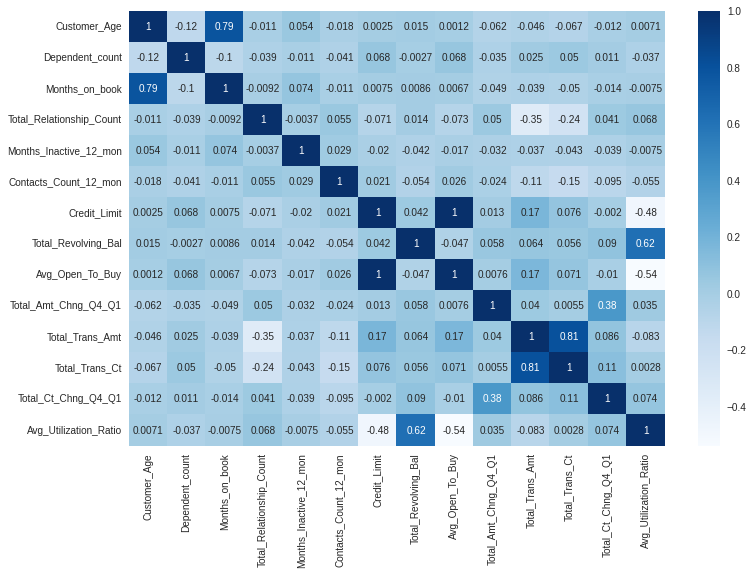

In [116]:
plt.subplots(figsize=(12, 8)) 
sns.heatmap(df.corr(), annot=True, cmap="Blues") 
plt.show()

From the pairwise plot above, it is shown that there is a positive linear correlation between the independent features that are the Credit_Limit and Monts_on_Bookentre columns.
AGE IS VERY CRITICAL IN THIS DATA SET

a clear example is the Customer_Age and Monthsonbook column, it shows that there is a positive linear correlation between them. It makes sense that when a customer is older, the duration of the subscription to the credit card service is longer.

logramos ver 

In [117]:
# df = pd.read_csv("/content/Electric Vehicles.csv")
# df.head(30)